# Imports,  Settings and Paths

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time

In [2]:
from DeepPotentialModel import SubNetwork, DeepPotential, train

In [3]:
data_path = '../Dataset/network_inputs.npy'
label_path = '../Dataset/network_labels.npy'

# Read the Data

In [4]:
X_train_npy = np.load(data_path)
Y_train_npy = np.load(label_path) * -1
#X_train_npy = X_train_npy.reshape(X_train_npy.shape[0]//19, 19, X_train_npy.shape[1])

In [5]:
X_train_npy.shape

(404000, 19, 72)

In [6]:
X_train_npy[:10]

array([[[ 0.98428251, -0.43573534,  0.89678201, ...,  0.54631672,
          0.94735855,  0.3201746 ],
        [ 0.25743376, -0.47514891,  0.96245338, ...,  0.86870339,
          0.68942316, -0.72435882],
        [ 0.40851593, -0.95220471,  0.78530783, ...,  0.84405572,
          0.7298331 , -0.68362538],
        ..., 
        [ 0.64920273, -0.97724382, -0.23175926, ...,  0.69398684,
         -0.79177114,  0.61081786],
        [ 0.29801453, -0.61337625,  0.9858909 , ...,  0.79760327,
         -0.51331737, -0.85819886],
        [ 0.31411019, -0.64647249,  0.99529744, ...,  0.62066757,
          0.95473082,  0.29747111]],

       [[ 0.21848204, -0.5609247 ,  0.97333811, ...,  0.39208275,
          0.9582126 ,  0.28605702],
        [ 0.244668  , -0.4142121 ,  0.97578724, ...,  0.89504158,
          0.62884931, -0.7775272 ],
        [ 0.37931909, -0.8948808 ,  0.97095955, ...,  0.89801404,
          0.66296726, -0.74864839],
        ..., 
        [ 0.29759032, -0.98564471,  0.96214343, ...,

In [7]:
use_ids = np.where(np.isnan(X_train_npy).sum(axis=2).sum(axis=1)==0)

In [8]:
use_ids

(array([     0,      1,      2, ..., 403997, 403998, 403999]),)

In [9]:
X_train_npy = X_train_npy[use_ids]
Y_train_npy = Y_train_npy[use_ids]

In [10]:
X_train_npy.shape

(404000, 19, 72)

In [11]:
shuffle = np.arange(X_train_npy.shape[0])
np.random.shuffle(shuffle)
print(shuffle[:10])
X_train_npy = X_train_npy[shuffle]
Y_train_npy = Y_train_npy[shuffle]

[ 48677 344879 179218  32642 311464 139183 235199 135021 275051 380798]


# Train Model

## Try to learn random Data


In [12]:
"""batchsize = 20
sub_dim = 18*4
atoms = 4
X_train = Variable(torch.randn(batchsize, atoms, sub_dim))
Y_train = Variable(torch.randn(batchsize, 1), requires_grad=False)

deepPot = DeepPotential()
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(deepPot.parameters(), lr=1e-4)

for step in range(10000):
    Y_pred = deepPot.forward(X_train)
    loss = loss_fn(Y_pred, Y_train)
    
    print('{}: {}'.format(step, loss.data[0]))
    
    optim.zero_grad()
    loss.backward()
    optim.step()
"""

"batchsize = 20\nsub_dim = 18*4\natoms = 4\nX_train = Variable(torch.randn(batchsize, atoms, sub_dim))\nY_train = Variable(torch.randn(batchsize, 1), requires_grad=False)\n\ndeepPot = DeepPotential()\nloss_fn = nn.MSELoss()\noptim = torch.optim.Adam(deepPot.parameters(), lr=1e-4)\n\nfor step in range(10000):\n    Y_pred = deepPot.forward(X_train)\n    loss = loss_fn(Y_pred, Y_train)\n    \n    print('{}: {}'.format(step, loss.data[0]))\n    \n    optim.zero_grad()\n    loss.backward()\n    optim.step()\n"

## Try on Real Data

In [13]:
X_data = Variable(torch.Tensor(X_train_npy))
Y_data = Variable(torch.Tensor(Y_train_npy), requires_grad=False) - 11500

0.1%: 1.322101 --- time estimate: 65.9 min
0.2%: 0.713376 --- time estimate: 63.9 min
0.3%: 0.660703 --- time estimate: 63.2 min
0.4%: 0.685168 --- time estimate: 62.7 min
0.5%: 0.673128 --- time estimate: 62.4 min
0.6%: 0.554007 --- time estimate: 62.0 min
0.7%: 0.639412 --- time estimate: 61.6 min
0.8%: 0.666769 --- time estimate: 61.3 min
0.9%: 0.595516 --- time estimate: 61.0 min
1.0%: 0.496707 --- time estimate: 60.8 min
1.1%: 0.623094 --- time estimate: 60.6 min
1.2%: 0.565344 --- time estimate: 60.5 min
1.3%: 0.581083 --- time estimate: 60.3 min
1.4%: 0.498061 --- time estimate: 60.6 min
1.5%: 0.644081 --- time estimate: 60.5 min
1.6%: 0.637792 --- time estimate: 60.3 min
1.7%: 0.461539 --- time estimate: 62.0 min
1.8%: 0.623555 --- time estimate: 61.9 min
1.9%: 0.516306 --- time estimate: 61.8 min
2.0%: 0.449385 --- time estimate: 61.6 min
2.1%: 0.554985 --- time estimate: 61.4 min
2.2%: 0.365555 --- time estimate: 61.3 min
2.3%: 0.39867 --- time estimate: 61.1 min
2.4%: 0.3575

19.0%: 0.136645 --- time estimate: 51.1 min
19.1%: 0.148766 --- time estimate: 51.0 min
19.2%: 0.133745 --- time estimate: 50.9 min
19.3%: 0.145931 --- time estimate: 50.9 min
19.4%: 0.153271 --- time estimate: 50.8 min
19.5%: 0.140214 --- time estimate: 50.7 min
19.6%: 0.090337 --- time estimate: 50.7 min
19.7%: 0.147104 --- time estimate: 50.6 min
19.8%: 0.129473 --- time estimate: 50.6 min
19.9%: 0.159596 --- time estimate: 50.5 min
20.0%: 0.1053 --- time estimate: 50.4 min
20.1%: 0.105234 --- time estimate: 50.4 min
20.2%: 0.121543 --- time estimate: 50.3 min
20.3%: 0.109319 --- time estimate: 50.2 min
20.4%: 0.110404 --- time estimate: 50.2 min
20.5%: 0.096934 --- time estimate: 50.1 min
20.6%: 0.100327 --- time estimate: 50.0 min
20.7%: 0.122574 --- time estimate: 50.0 min
20.8%: 0.136167 --- time estimate: 49.9 min
20.9%: 0.134166 --- time estimate: 49.9 min
21.0%: 0.124064 --- time estimate: 49.8 min
21.1%: 0.110548 --- time estimate: 49.7 min
21.2%: 0.139552 --- time estimate:

37.7%: 0.104196 --- time estimate: 39.1 min
37.8%: 0.136873 --- time estimate: 39.1 min
37.9%: 0.080529 --- time estimate: 39.0 min
38.0%: 0.108334 --- time estimate: 39.0 min
38.1%: 0.106169 --- time estimate: 38.9 min
38.2%: 0.129009 --- time estimate: 38.8 min
38.3%: 0.096047 --- time estimate: 38.8 min
38.4%: 0.104679 --- time estimate: 38.7 min
38.5%: 0.108819 --- time estimate: 38.6 min
38.6%: 0.088277 --- time estimate: 38.6 min
38.7%: 0.10121 --- time estimate: 38.5 min
38.8%: 0.125501 --- time estimate: 38.4 min
38.9%: 0.117139 --- time estimate: 38.4 min
39.0%: 0.129702 --- time estimate: 38.3 min
39.1%: 0.160115 --- time estimate: 38.3 min
39.2%: 0.111801 --- time estimate: 38.2 min
39.3%: 0.175814 --- time estimate: 38.1 min
39.4%: 0.130553 --- time estimate: 38.1 min
39.5%: 0.104121 --- time estimate: 38.0 min
39.6%: 0.121448 --- time estimate: 37.9 min
39.7%: 0.122987 --- time estimate: 37.9 min
39.8%: 0.090523 --- time estimate: 37.8 min
39.9%: 0.118186 --- time estimate

56.4%: 0.09649 --- time estimate: 27.4 min
56.5%: 0.107314 --- time estimate: 27.4 min
56.6%: 0.106457 --- time estimate: 27.3 min
56.7%: 0.101171 --- time estimate: 27.2 min
56.8%: 0.084501 --- time estimate: 27.2 min
56.9%: 0.10486 --- time estimate: 27.1 min
57.0%: 0.101327 --- time estimate: 27.0 min
57.1%: 0.085144 --- time estimate: 27.0 min
57.2%: 0.098176 --- time estimate: 26.9 min
57.3%: 0.099378 --- time estimate: 26.9 min
57.4%: 0.068504 --- time estimate: 26.8 min
57.5%: 0.103636 --- time estimate: 26.7 min
57.6%: 0.095268 --- time estimate: 26.7 min
57.7%: 0.105884 --- time estimate: 26.6 min
57.8%: 0.093443 --- time estimate: 26.5 min
57.9%: 0.087401 --- time estimate: 26.5 min
58.0%: 0.098351 --- time estimate: 26.4 min
58.1%: 0.08878 --- time estimate: 26.4 min
58.2%: 0.095671 --- time estimate: 26.3 min
58.3%: 0.110432 --- time estimate: 26.2 min
58.4%: 0.108603 --- time estimate: 26.2 min
58.5%: 0.096084 --- time estimate: 26.1 min
58.6%: 0.08985 --- time estimate: 2

75.1%: 0.098056 --- time estimate: 15.7 min
75.2%: 0.111741 --- time estimate: 15.6 min
75.3%: 0.096889 --- time estimate: 15.6 min
75.4%: 0.102783 --- time estimate: 15.5 min
75.5%: 0.094396 --- time estimate: 15.5 min
75.6%: 0.106522 --- time estimate: 15.4 min
75.7%: 0.078357 --- time estimate: 15.3 min
75.8%: 0.106673 --- time estimate: 15.3 min
75.9%: 0.09393 --- time estimate: 15.2 min
76.0%: 0.081304 --- time estimate: 15.1 min
76.1%: 0.0963 --- time estimate: 15.1 min
76.2%: 0.094181 --- time estimate: 15.0 min
76.3%: 0.08261 --- time estimate: 15.0 min
76.4%: 0.091084 --- time estimate: 14.9 min
76.5%: 0.101602 --- time estimate: 14.8 min
76.6%: 0.091602 --- time estimate: 14.8 min
76.7%: 0.089787 --- time estimate: 14.7 min
76.8%: 0.092569 --- time estimate: 14.6 min
76.9%: 0.097964 --- time estimate: 14.6 min
77.0%: 0.092507 --- time estimate: 14.5 min
77.1%: 0.112429 --- time estimate: 14.5 min
77.2%: 0.07965 --- time estimate: 14.4 min
77.3%: 0.111281 --- time estimate: 14

94.0%: 0.096806 --- time estimate: 3.8 min
94.1%: 0.08412 --- time estimate: 3.7 min
94.2%: 0.131843 --- time estimate: 3.7 min
94.3%: 0.091892 --- time estimate: 3.6 min
94.4%: 0.083042 --- time estimate: 3.5 min
94.5%: 0.087596 --- time estimate: 3.5 min
94.6%: 0.087529 --- time estimate: 3.4 min
94.7%: 0.080702 --- time estimate: 3.3 min
94.8%: 0.084743 --- time estimate: 3.3 min
94.9%: 0.084092 --- time estimate: 3.2 min
95.0%: 0.106851 --- time estimate: 3.2 min
95.1%: 0.102225 --- time estimate: 3.1 min
95.2%: 0.084403 --- time estimate: 3.0 min
95.3%: 0.081695 --- time estimate: 3.0 min
95.4%: 0.088804 --- time estimate: 2.9 min
95.5%: 0.089242 --- time estimate: 2.8 min
95.6%: 0.064911 --- time estimate: 2.8 min
95.7%: 0.08826 --- time estimate: 2.7 min
95.8%: 0.095146 --- time estimate: 2.7 min
95.9%: 0.099636 --- time estimate: 2.6 min
96.0%: 0.104412 --- time estimate: 2.5 min
96.1%: 0.063713 --- time estimate: 2.5 min
96.2%: 0.085282 --- time estimate: 2.4 min
96.3%: 0.1071

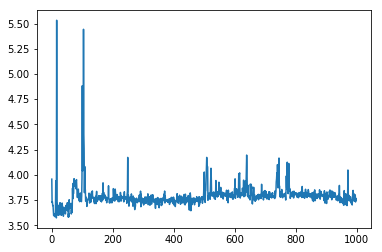

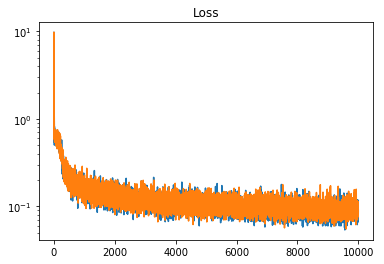

In [15]:
deep_pot = DeepPotential()
optim = torch.optim.Adam(deep_pot.parameters(), lr=1e-2)
test_deep, optim_deep = train(deep_pot, optim, X_data, Y_data, 10000, 128, (0.1, 0.98, 5), print_every=10)

In [ ]:
np.abs(deep_pot.forward(X_data[-500:]).data.numpy().reshape(500) - Y_data[-500:].data.numpy().reshape(500)).mean()

In [20]:
deep_pot.forward(X_data[-10:])

Variable containing:
 3.2249
 3.3548
 4.5668
 3.9102
 4.6868
 2.8623
 2.6490
 4.3969
 4.7651
 4.1259
[torch.FloatTensor of size 10x1]

In [22]:
Y_data[-10:]

Variable containing:
 3.5186
 3.3047
 4.0225
 4.0488
 4.2432
 3.3682
 2.6348
 4.0361
 4.9121
 3.6816
[torch.FloatTensor of size 10]

1.0%: 0.157585 --- time estimate: 6.8 min
2.0%: 0.153385 --- time estimate: 6.6 min
3.0%: 0.114213 --- time estimate: 6.5 min
4.0%: 0.135551 --- time estimate: 6.4 min
5.0%: 0.141831 --- time estimate: 6.3 min
6.0%: 0.166112 --- time estimate: 6.2 min
7.0%: 0.150155 --- time estimate: 6.1 min
8.0%: 0.144616 --- time estimate: 6.0 min
9.0%: 0.127441 --- time estimate: 5.9 min
10.0%: 0.223941 --- time estimate: 5.8 min
11.0%: 0.149378 --- time estimate: 5.8 min
12.0%: 0.184424 --- time estimate: 5.7 min
13.0%: 0.156317 --- time estimate: 5.6 min
14.0%: 0.161891 --- time estimate: 5.5 min
15.0%: 0.158851 --- time estimate: 5.5 min
16.0%: 0.13376 --- time estimate: 5.4 min
17.0%: 0.149858 --- time estimate: 5.4 min
18.0%: 0.134363 --- time estimate: 5.3 min
19.0%: 0.155022 --- time estimate: 5.2 min
20.0%: 0.154878 --- time estimate: 5.2 min
21.0%: 0.168661 --- time estimate: 5.1 min
22.0%: 0.140469 --- time estimate: 5.0 min
23.0%: 0.143598 --- time estimate: 5.0 min
24.0%: 0.164838 --- t

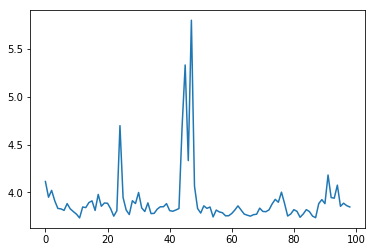

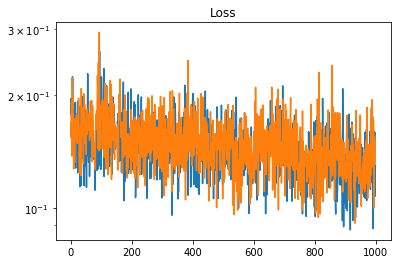

In [17]:
test_deep, optim_deep = train(deep_pot, optim_deep, X_data, Y_data, 1000, 128, (0.005, 0.98, 1.5), use_for_train=0.9, print_every=10)

In [ ]:
test_deep2, optim_deep2 = train(deep_pot, optim_deep, X_data, Y_data, 10000, 128, 0.0001, print_every=10)

In [ ]:
test_deep2.forward(X[-15:])

In [ ]:
Y_data = Y_data - 11500

In [ ]:
batchsize = 1

X_data = Variable(torch.Tensor(X_train_npy))
Y_data = Variable(torch.Tensor(Y_train_npy), requires_grad=False)
Y_data = Y_data - Y_data.mean()

X_train = X_data[:5000]
Y_train = Y_data[:5000]
X_test = X_data[5000:]
Y_test = Y_data[5000:]

deepPot = DeepPotential()
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(deepPot.parameters(), lr=0.9)

steps = []
losses = []
total_steps = 20000
for step in range(total_steps):
    if step == 1000:
        optim.lr = 1e-3
    if step == 10000:
        optim.lr = 1e-6
        #print(list(deepPot.parameters())[0])
    ids = np.random.randint(0, 5000, batchsize).tolist()
    Y_pred = deepPot.forward(X_train[ids])
    loss = loss_fn(Y_pred, Y_train[ids])
    if step % 10 == 0:
        print('{}%: {} -- {}'.format(step/total_steps, Y_pred.data[0][0], loss.data[0]))
    steps.append(step)
    losses.append(loss.data[0])
    
    optim.zero_grad()
    loss.backward()
    optim.step()

plt.plot(steps, losses)

## Test Subnetwork on learning the norm of 

In [ ]:
X_dummy = np.random.random((1000, 19, 72))
Y_dummy = np.linalg.norm(X_dummy, axis=1)
Y_dummy -= min(Y_dummy)
Y_dummy /= max(Y_dummy)

X = Variable(torch.Tensor(X_dummy))
Y = Variable(torch.Tensor(Y_dummy), requires_grad=False)

sub_model = train(DeepPotential, X, Y, 1000, 10, 1e-4)

## Test DeepPotential on Sum of 19 Norms of dim 72

### Create Data

In [ ]:
X_dummy = np.sort(np.random.random((6000, 19, 72)), axis=2)
Y_dummy = np.linalg.norm(X_dummy, axis=2).sum(axis=1)
#Y_dummy -= min(Y_dummy)
#Y_dummy /= max(Y_dummy)

X = Variable(torch.Tensor(X_dummy))
Y = Variable(torch.Tensor(Y_dummy), requires_grad=False)

### Initial

In [ ]:
test_deep = DeepPotential()
list(test_deep.parameters())

In [ ]:
list(test_deep.parameters())

In [ ]:
optim = torch.optim.Adam(test_deep.parameters(), lr=1e-2)
test_deep, optim_deep = train(test_deep, optim, X, Y, 100, 128, 1, print_every=10)

In [ ]:
test_deep, optim_deep = train(test_deep, optim_deep, X, Y, 500, 128, 0.1, print_every=10)

In [ ]:
from DeepPotentialModel import SubNetwork, DeepPotential, train

In [ ]:
list(test_deep.parameters())

In [ ]:
test_deep.forward(X[-15:])

In [ ]:
Y[-15:]

In [ ]:
np.round(0.002, 3)

In [ ]:
test_deep.forward(X[-30:-10])

In [ ]:
Y[-30:-10]

In [ ]:
list(test_deep.parameters())

In [ ]:
epochs = np.arange(1, 1000)
losses = np.arange(1001, 2000)
tests = np.arange(1, 1000)

f_loss, ax_loss = plt.subplots()
ax_loss.semilogy(epochs, losses, label='train')
ax_loss.set_title("Loss")
ax_loss.semilogy(epochs, tests, label='test')